#Stock Market Analysis And Forecasting
A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging
problem for statistics experts and
nance. The main reason
behind this prediction is buying stocks that are likely to
increase in price and then selling stocks that are probably
to fall. Generally, there are two ways for stock market prediction.
Fundamental analysis is one of them and relies on a
company's technique and fundamental information like market position, expenses and annual growth rates. The second
one is the technical analysis method, which concentrates on
previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

#Dataset
 1. Google
 2. Microsoft
 3. IBM
 4. Amazon
  

#Analysis

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
amazon = pd.read_csv('/content/drive/MyDrive/CS-583-A/AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [6]:
ibm = pd.read_csv('/content/drive/MyDrive/CS-583-A/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [8]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


For the Amazon dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [9]:
amazon.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [10]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


But for the IBM dataset, we can see all the value is nearly close to the mean.

In [11]:
ibm.isna().sum()

,0
Open,1
High,0
Low,1
Close,0
Volume,0
Name,0


In [12]:
ibm.dropna(inplace=True)


In [13]:
ibm.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


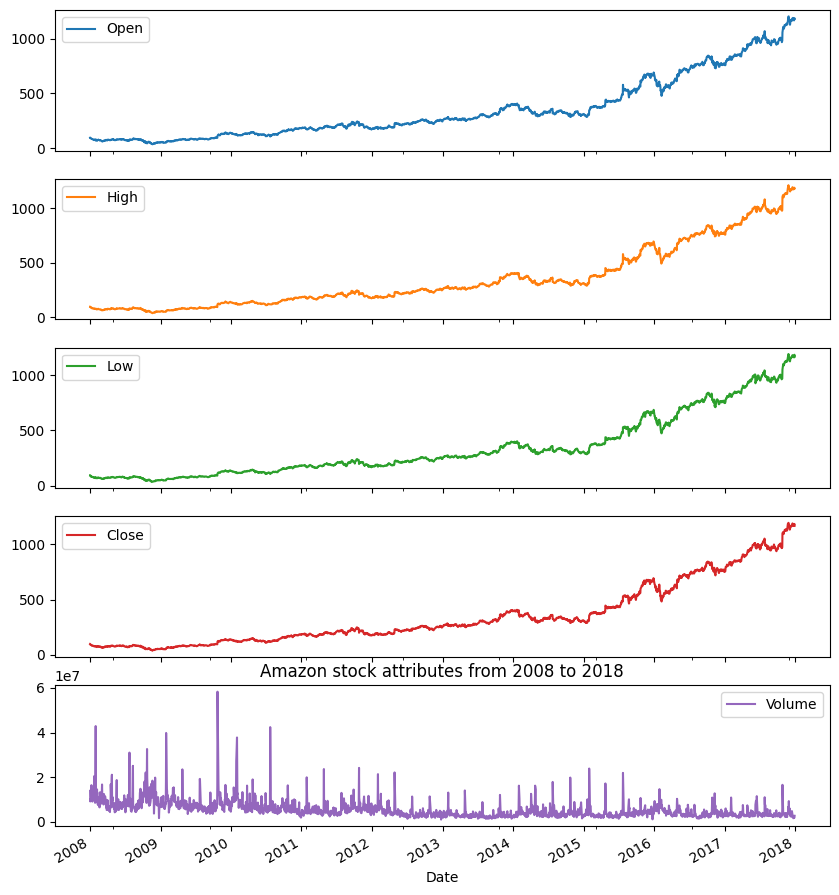

In [14]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

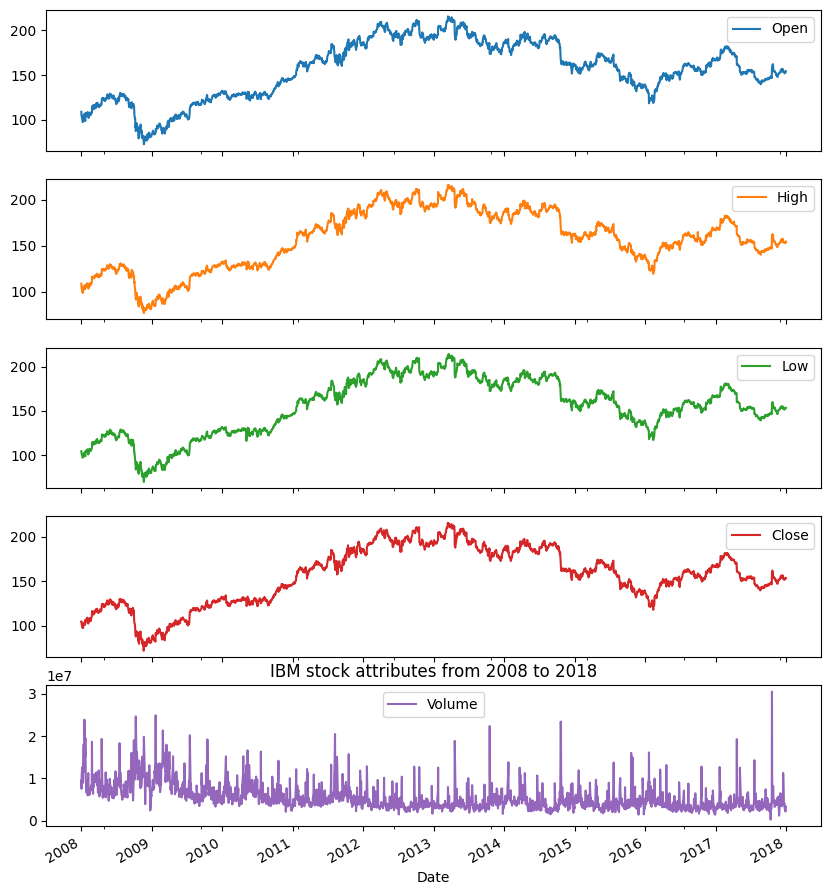

In [15]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

###High plot

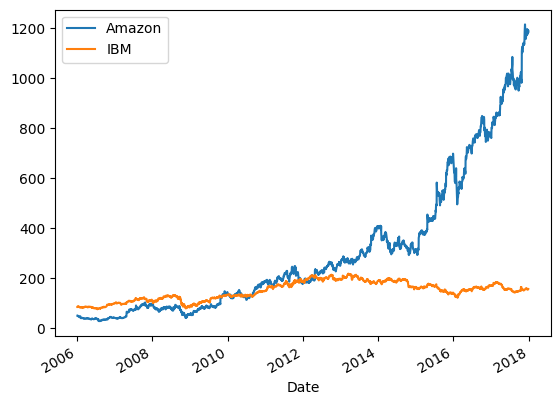

In [16]:
# Plotting before normalization
amazon.High.plot()
ibm.High.plot()
plt.legend(['Amazon','IBM'])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value.

In [17]:
# Normalizing and comparison
# Both stocks start from 100
'''normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_amazon = amazon.High.div(google.High.iloc[0]).mul(100)
normalized_ibm = ibm.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()'''

"normalized_google = google.High.div(google.High.iloc[0]).mul(100)\nnormalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)\nnormalized_amazon = amazon.High.div(google.High.iloc[0]).mul(100)\nnormalized_ibm = ibm.High.div(microsoft.High.iloc[0]).mul(100)\nnormalized_google.plot()\nnormalized_microsoft.plot()\nnormalized_amazon.plot()\nnormalized_ibm.plot()\nplt.legend(['Google','Microsoft','Amazon','IBM'])\nplt.show()"

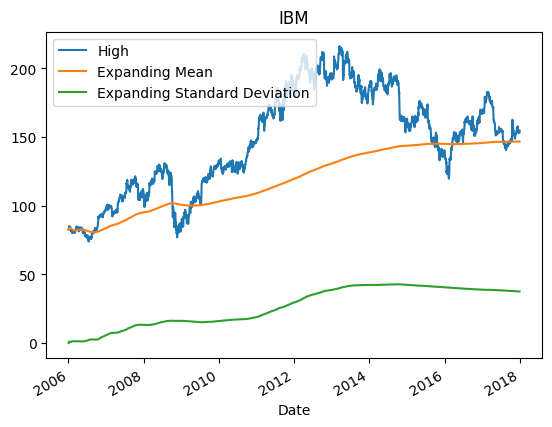

In [18]:
# Expanding window functions
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()

For IBM data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. And after 2013 again a drop then in 2016 there was a huge loss but after that, they were doing well. After just some profit again in between 2017, there was another drop.

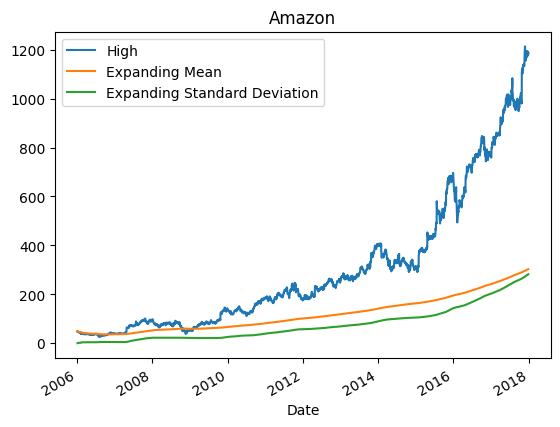

In [19]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

##Here we can see every company faced a loss in 2009, maybe that's because of the economic slowdown.

In [20]:
!pip install --upgrade statsmodels

from pylab import rcParams
import statsmodels.api as sm

##Trend and Seasonality

IBM data

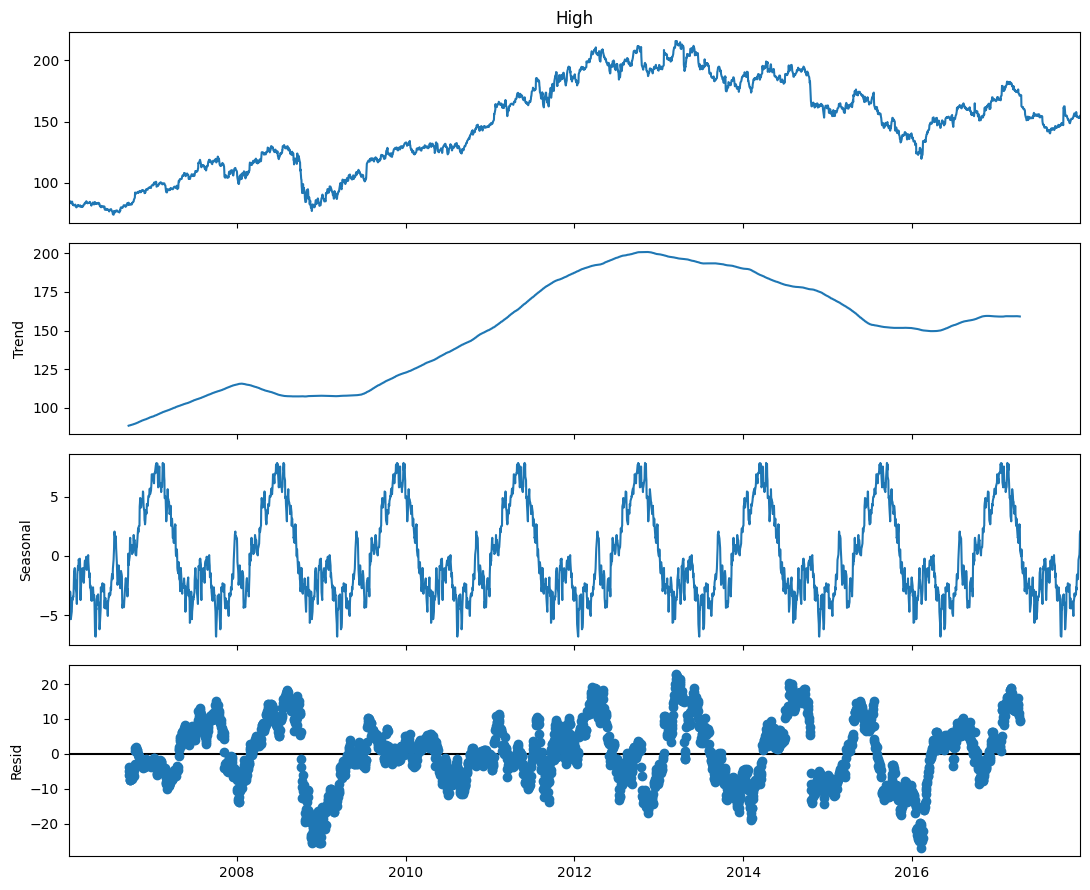

In [21]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

IBM data has a very slow increasing trend until 2008, but after 2009 there was an exponential high trend until 2013, then a high drop until 2016 then a very slow increasing trend. And very high seasonality.

Amazon data

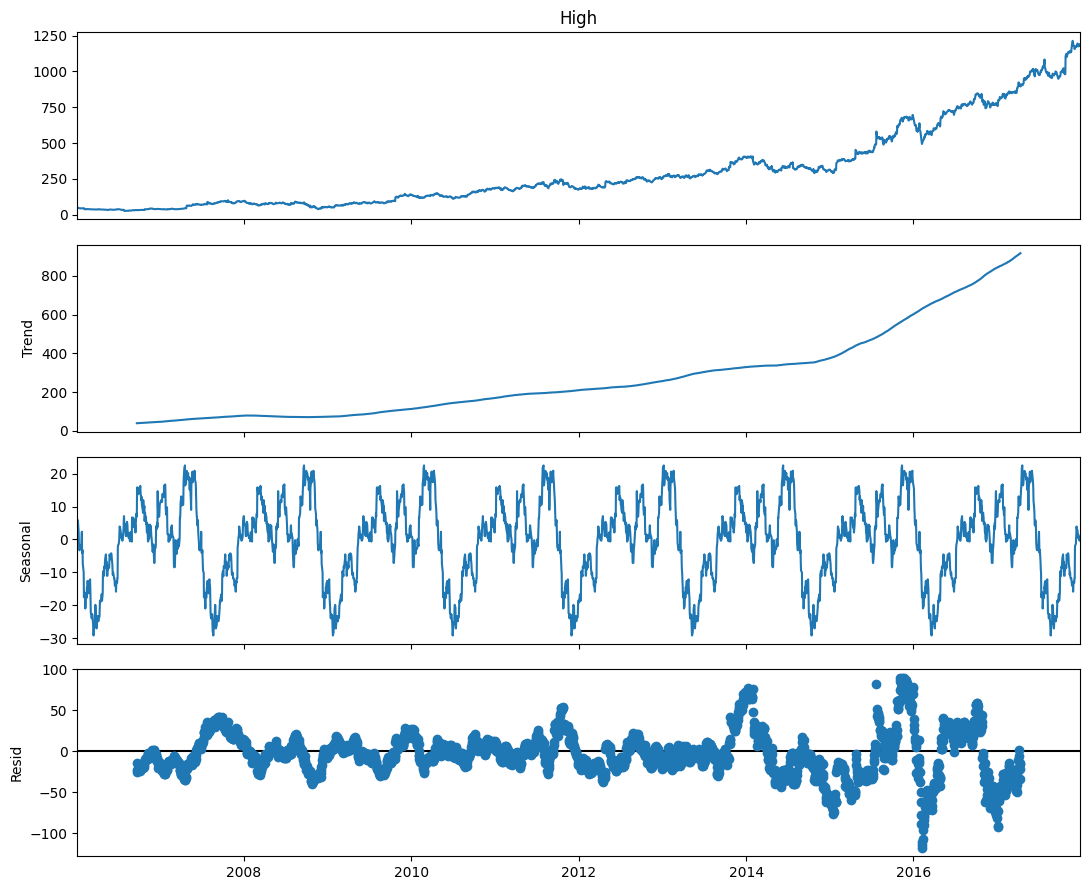

In [22]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Amazon data has a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.

#Prediction

##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


#GRU Model:
Gated recurrent unit  is essentially a simplified LSTM. It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.



<img src='https://d2l.ai/_images/gru-1.svg' />


By using GRU time series forecasting we will forcaste and check.

In [23]:
data_amazon = amazon.sort_values('Date')
data_amazon.head()


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


KeyError: 'Date'

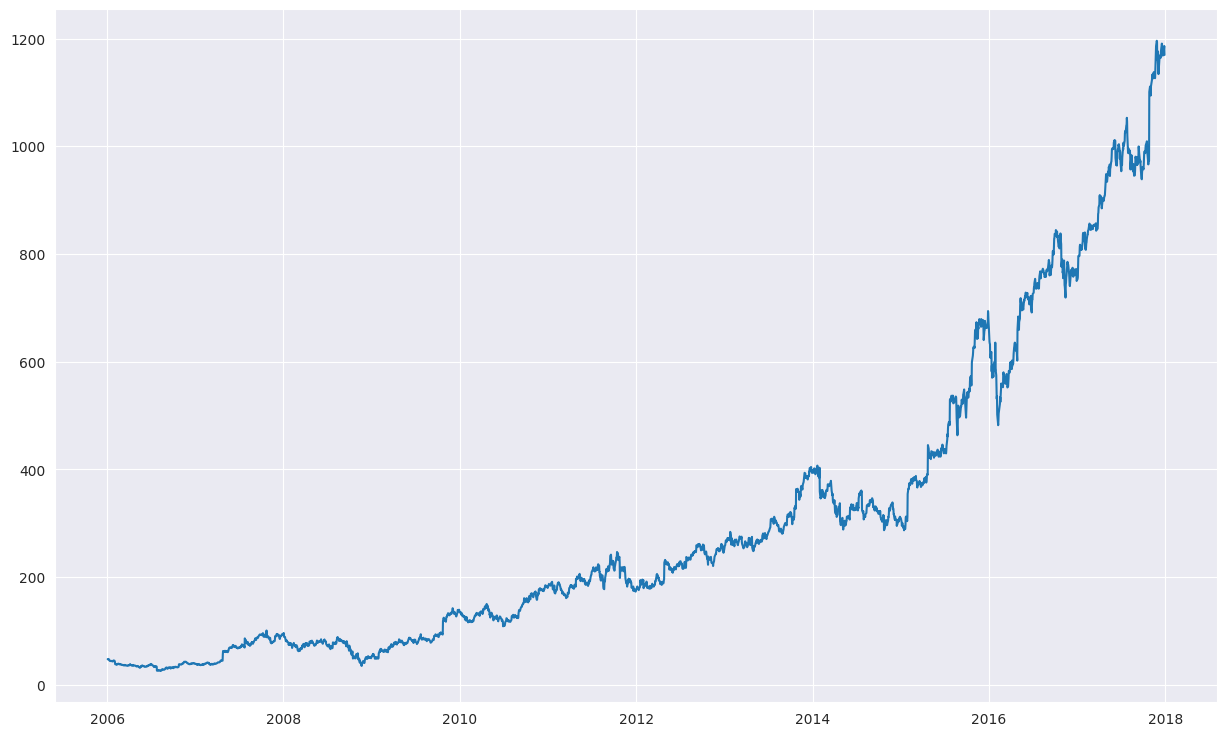

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [25]:

data_ibm = ibm.sort_values('Date')
data_ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [26]:
data_ibm.dropna(inplace=True)

KeyError: 'Date'

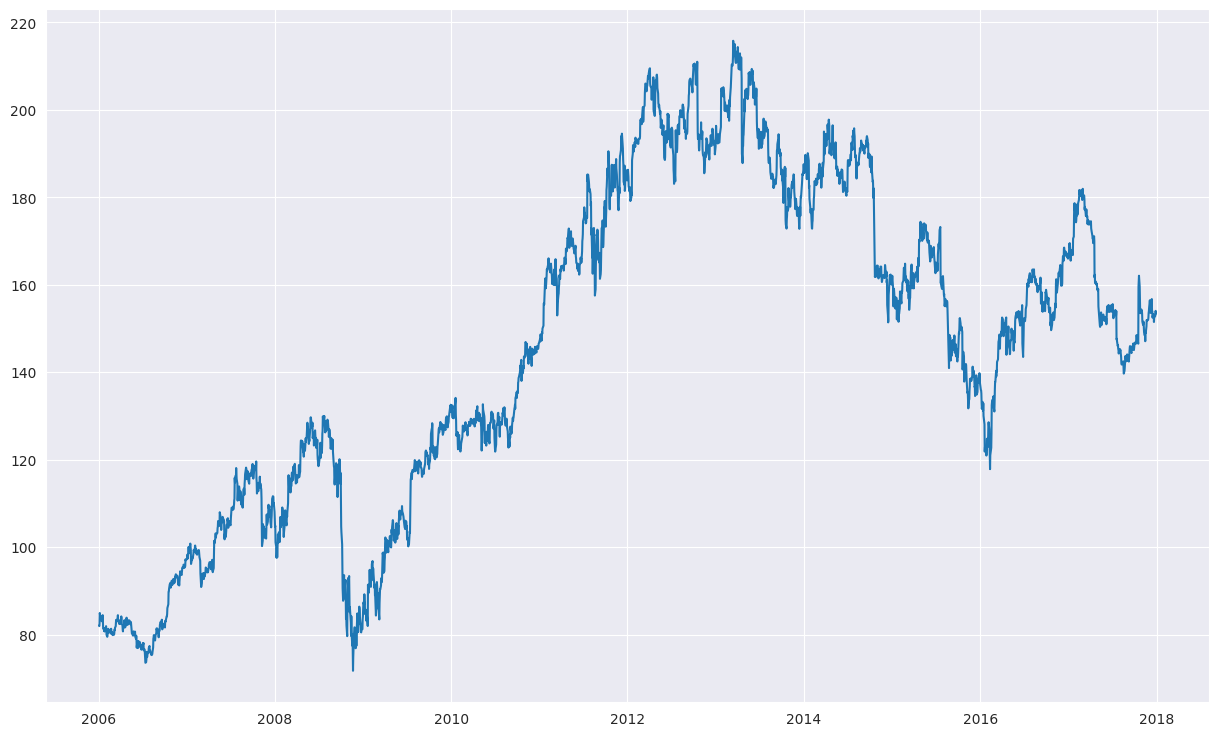

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler


price_amazon = data_amazon[['Close']]
price_amazon.info()

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 111.7 KB


<ipython-input-29-3b7684fdcda4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))


In [30]:

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [31]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [32]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 50

In [37]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

def lstm_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=y_train.shape[1]))

    # Define optimizer within compile
    optimizer = Adam() # Create an instance of the Adam optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=10, batch_size=32)
    return model, history

model, history = lstm_model(x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1430
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0077
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0067
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0051
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0051
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0045
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0042
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0041
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0040


In [39]:
# Define loss function
loss_fn = torch.nn.MSELoss()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


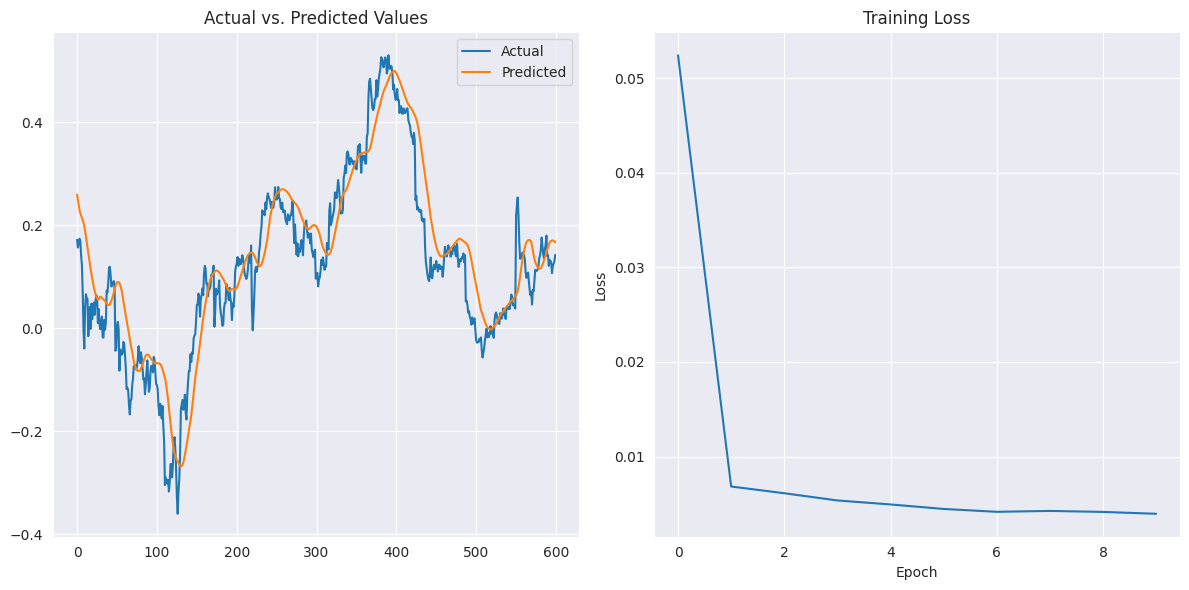

In [55]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'predictions' are available
# Replace with your actual predicted values
predictions = model.predict(x_test)

# Assuming 'history' object from model training is available
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')

# Plot the training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [43]:
# prompt: calculate train and test RMSE score

import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'y_test' and 'predictions' are available from previous code
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE: {rmse_test}")

# Assuming 'y_train' and the model are available
train_predictions = model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f"Train RMSE: {rmse_train}")

Test RMSE: 0.06962691953868917
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Train RMSE: 0.022716537078563963


In [46]:
import math
from sklearn.metrics import mean_squared_error


# Calculate Accuracy

amazon_accuracy = 100 - (rmse_test / np.mean(y_test[:,0])) * 100
print(f"Amazon Accuracy: {amazon_accuracy:.2f}%")

Amazon Accuracy: 77.68%


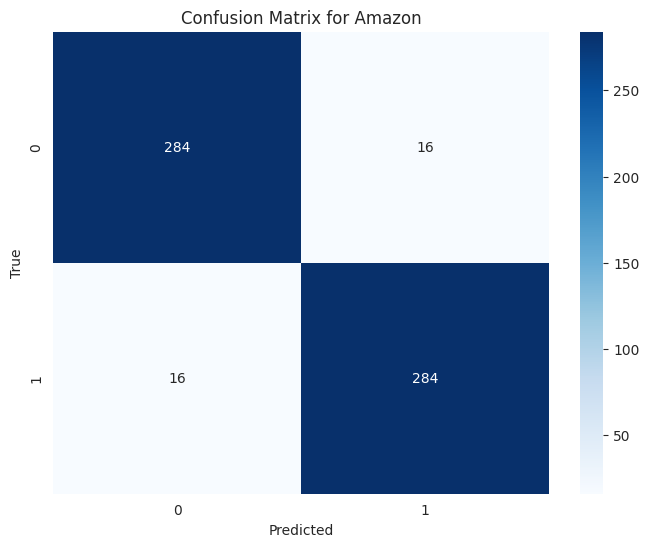

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Convert both true values and predictions to binary labels (0 or 1)
y_test_binary = np.where(y_test[:, 0] > np.median(y_test[:, 0]), 1, 0)
y_pred_binary = np.where(predictions[:, 0] > np.median(predictions[:, 0]), 1, 0)

# Amazon Confusion Matrix
cm_amazon = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_amazon, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Amazon")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [51]:

price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 111.7 KB


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

<ipython-input-52-9915b8518dae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))


In [53]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [54]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [56]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

def lstm_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=y_train.shape[1]))

    # Define optimizer within compile
    optimizer = Adam() # Create an instance of the Adam optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=10, batch_size=32)
    return model, history

model, history = lstm_model(x_train, y_train, x_test, y_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0723
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0082
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0077
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0074
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0077
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0067
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0061
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0065
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0061
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0057


In [57]:
# Define loss function
loss_fn = torch.nn.MSELoss()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


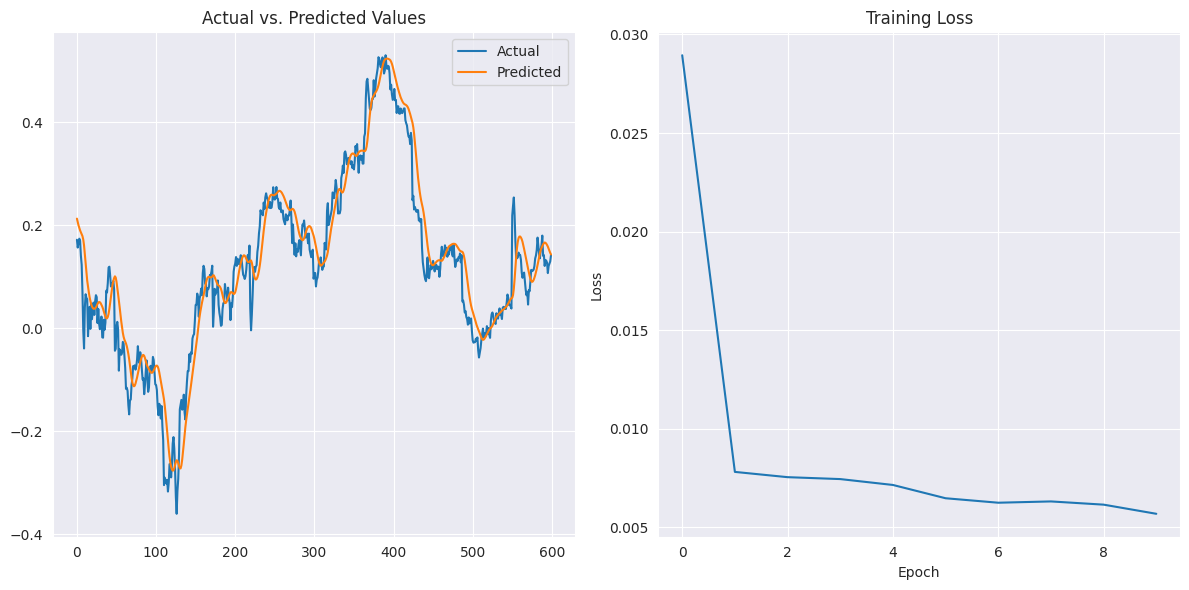

In [58]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'predictions' are available
# Replace with your actual predicted values
predictions = model.predict(x_test)

# Assuming 'history' object from model training is available
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')

# Plot the training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'y_test' and 'predictions' are available from previous code
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE: {rmse_test}")

# Assuming 'y_train' and the model are available
train_predictions = model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f"Train RMSE: {rmse_train}")

Test RMSE: 0.051445453521704064
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Train RMSE: 0.05388621546542584


In [60]:
import math
from sklearn.metrics import mean_squared_error


# Calculate Accuracy

amazon_accuracy = 100 - (rmse_test / np.mean(y_test[:,0])) * 100
print(f"Amazon Accuracy: {amazon_accuracy:.2f}%")

Amazon Accuracy: 56.40%


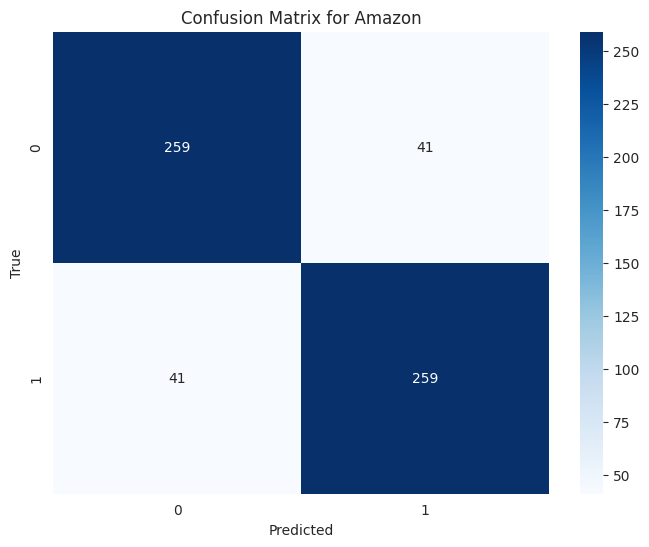

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Convert both true values and predictions to binary labels (0 or 1)
y_test_binary = np.where(y_test[:, 0] > np.median(y_test[:, 0]), 1, 0)
y_pred_binary = np.where(predictions[:, 0] > np.median(predictions[:, 0]), 1, 0)

# Amazon Confusion Matrix
cm_amazon = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_amazon, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Amazon")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()